In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [21]:
df=pd.read_csv("../data/processed/cars_model_data.csv")

In [4]:
df

,Age,KM,Weight,HP,CC,Doors,MetColor,Price
0,23,46986,1165,90.0,2000,3,1.0,13500
1,23,72937,1165,90.0,2000,3,1.0,13750
2,24,41711,1165,90.0,2000,3,1.0,13950
3,26,48000,1165,90.0,2000,3,0.0,14950
4,30,38500,1170,90.0,2000,3,0.0,13750
...,...,...,...,...,...,...,...,...
1431,60,20544,1025,86.0,1300,3,1.0,7500
1432,72,63634,1015,86.0,1300,3,0.0,10845
1433,60,17016,1015,86.0,1300,3,0.0,8500
1434,70,63634,1015,86.0,1300,3,1.0,7250


In [5]:
df.head()

,Age,KM,Weight,HP,CC,Doors,MetColor,Price
0,23,46986,1165,90.0,2000,3,1.0,13500
1,23,72937,1165,90.0,2000,3,1.0,13750
2,24,41711,1165,90.0,2000,3,1.0,13950
3,26,48000,1165,90.0,2000,3,0.0,14950
4,30,38500,1170,90.0,2000,3,0.0,13750


In [6]:
X=df.drop("Price",axis=1)
y=df["Price"]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2 ,random_state=42)


In [8]:
print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (1148, 7)
Testing samples: (288, 7)


In [9]:
y_test.shape

(288,)

In [10]:
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [11]:
lr_pred=lr.predict(X_test)

In [12]:
mae=mean_absolute_error(y_test,lr_pred)
rmse=np.sqrt(mean_squared_error(y_test,lr_pred))
r2=r2_score(y_test,lr_pred)

print("Linear Regression model")
print("mae",mae)
print("rmse",rmse)
print("r2score",r2)


Linear Regression model
mae 987.574628302254
rmse 1567.7537766584403
r2score 0.815791740915769


In [13]:
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [14]:
rf_pred=rf.predict(X_test)

In [22]:
mae_rf=mean_absolute_error(y_test,rf_pred)
rmse_rf=np.sqrt(mean_squared_error(y_test,rf_pred))
r2_rf=r2_score(y_test,rf_pred)

print("RandomForest model")
print("mae",mae_rf)
print("rmse",rmse_rf)
print("r2score",r2_rf)

RandomForest model
mae 889.0767361111111
rmse 1239.5438199699495
r2score 0.8848464965140359


In [16]:
print("Linear Regression R2:", r2)
print("Random Forest R2:", r2_rf)


Linear Regression R2: 0.815791740915769
Random Forest R2: 0.8848464965140359


Age         0.774897
Weight      0.098151
KM          0.080655
HP          0.026688
Doors       0.007647
CC          0.006033
MetColor    0.005929
dtype: float64


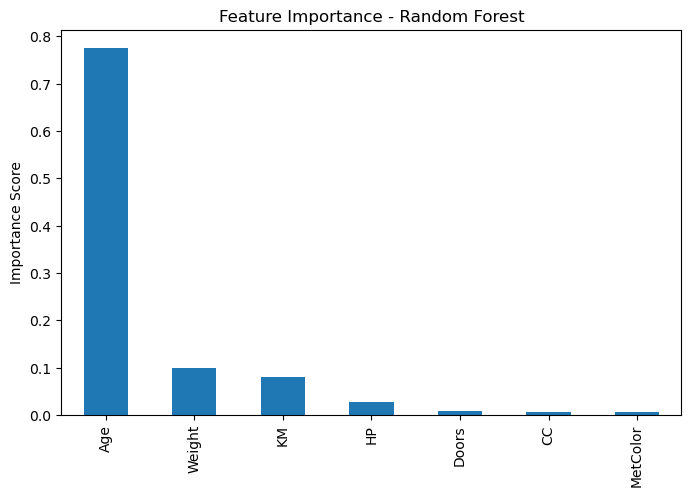

In [17]:

importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print(feat_imp)

feat_imp.plot(kind="bar", figsize=(8,5))
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.show()

In [23]:
features_reduced = ["Age", "KM", "Weight", "HP"]

X_red = df[features_reduced]
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X_red, y, test_size=0.2, random_state=42
)

rf_red = RandomForestRegressor(random_state=42)
rf_red.fit(X_train, y_train)

y_pred_red = rf_red.predict(X_test)

print("Reduced RF R2:", r2_score(y_test, y_pred_red))


Reduced RF R2: 0.8835118405108935


In [19]:

import joblib

X_final = df[["Age", "KM", "Weight", "HP"]]
y_final = df["Price"]

final_model = RandomForestRegressor(random_state=42)
final_model.fit(X_final, y_final)

joblib.dump(final_model, "../models/car_price_model_final.pkl")


['../models/car_price_model_final.pkl']